In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

## Objective: 
Identify key drivers of customer attrition. We will explore how tenure, contract type, and monthly charges correlate with churn.

In [2]:
df = pd.read_csv('../data/telco_clean.csv')
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn_binary,gender_Female,gender_Male,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,True,False,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
1,0,0,0,34,1,0,56.95,1889.50,0,False,True,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
2,0,0,0,2,1,1,53.85,108.15,1,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True
3,0,0,0,45,0,0,42.30,1840.75,0,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False
4,0,0,0,2,1,1,70.70,151.65,1,True,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False


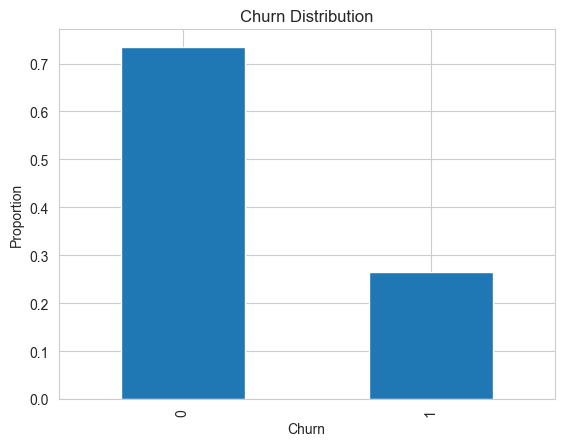

In [3]:
df['Churn_binary'].value_counts(normalize=True).plot(
    kind='bar',
    title='Churn Distribution',
    ylabel='Proportion',
    xlabel='Churn'
)
plt.show()

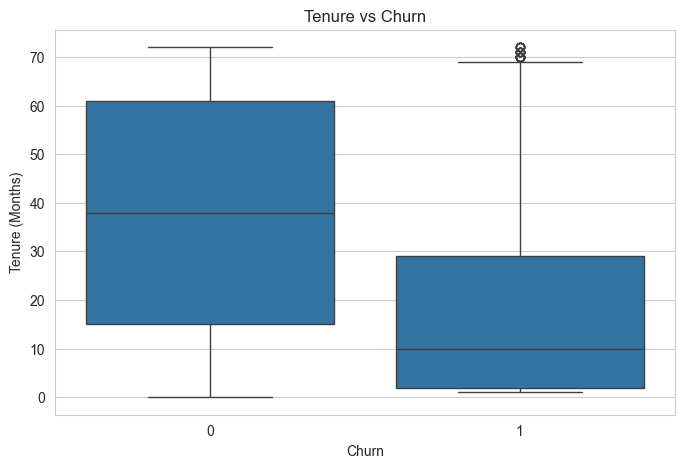

In [4]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Churn_binary',
    y='tenure',
    data=df
)
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

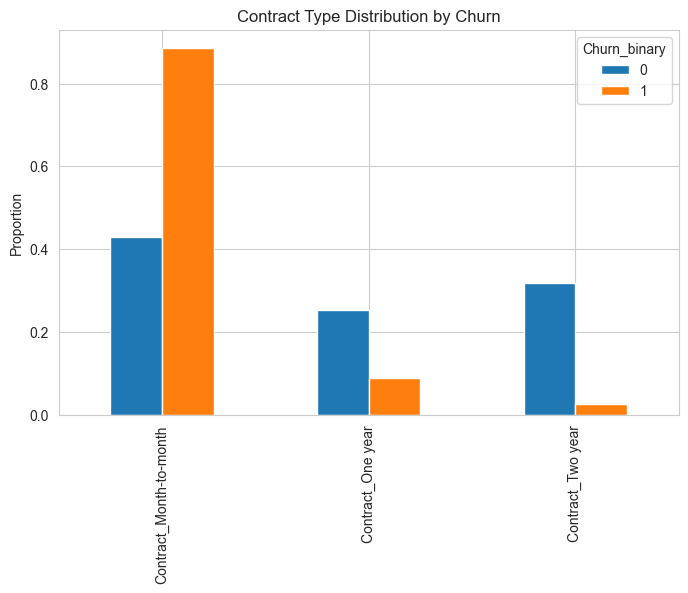

In [5]:
contract_cols = [c for c in df.columns if c.startswith('Contract_')]

churn_by_contract = df.groupby('Churn_binary')[contract_cols].mean().T

churn_by_contract.plot(
    kind='bar',
    figsize=(8, 5),
    title='Contract Type Distribution by Churn'
)
plt.ylabel('Proportion')
plt.show()

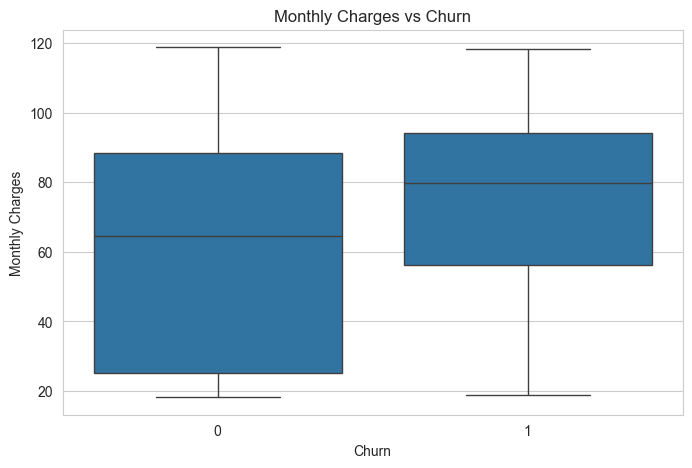

In [6]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='Churn_binary',
    y='MonthlyCharges',
    data=df
)
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

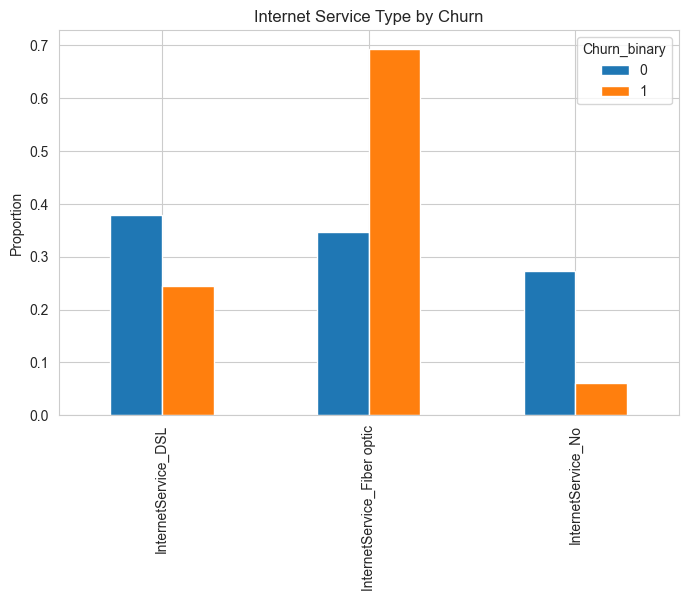

In [7]:
internet_cols = [c for c in df.columns if c.startswith('InternetService_')]

df.groupby('Churn_binary')[internet_cols].mean().T.plot(
    kind='bar',
    figsize=(8, 5),
    title='Internet Service Type by Churn'
)
plt.ylabel('Proportion')
plt.show()

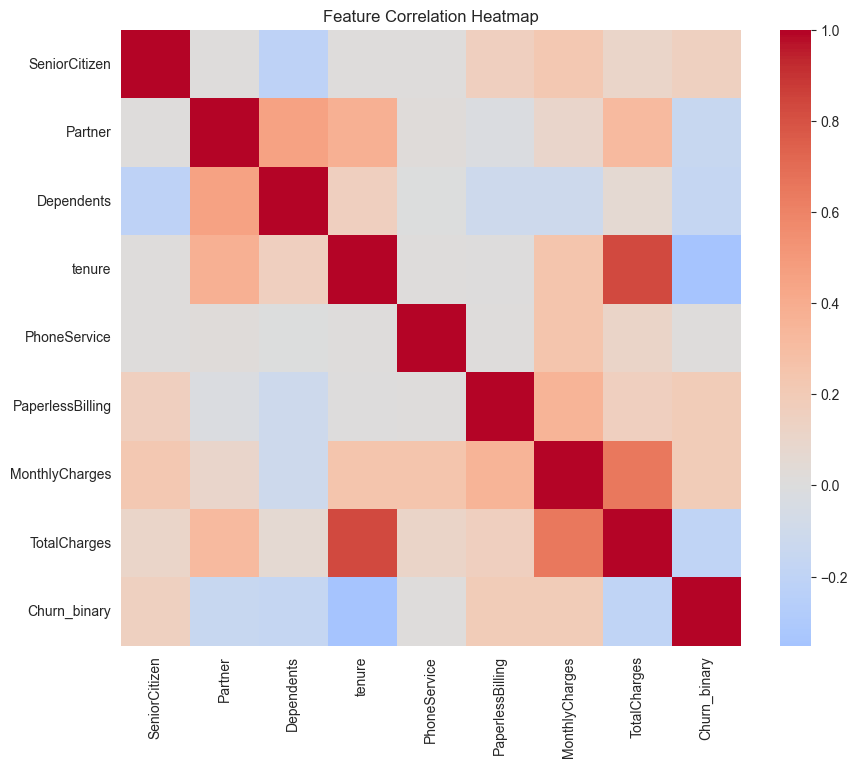

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 8))
sns.heatmap(
    numeric_df.corr(),
    cmap='coolwarm',
    center=0
)
plt.title('Feature Correlation Heatmap')
plt.show()

## Key EDA Insights

- Churn is strongly associated with low tenure
- Month-to-month contracts exhibit the highest churn rates
- Higher monthly charges increase churn likelihood
- Fiber optic internet customers churn more frequently
- These patterns suggest actionable levers for churn reduction strategies